Kita akan menggunakan data Wine untuk latihan. Datanya terdiri dari:

a. wine.data.txt --> dataset yang akan kita gunakan

b. wine.names --> metadata dari dataset wine.data

Silahkan download kedua data diatas melalui [link ini](https://drive.google.com/drive/folders/1_ngw8-LWIzY2MtOVqMLLGqJrWqQPh2Im?usp=sharing).

Setelah itu, upload file data tersebut ke dalam folder google colab kita:


In [ ]:
# upload file yang sudah di download
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
data = files.upload()

Saving wine.data.txt to wine.data.txt
Saving wine.names to wine.names


In [ ]:
# Cek apakah file yang Anda upload sudah ada dalam folder menggunakan kode berikut:

!ls

# Jika sudah ter upload, nama file yang Anda upload akan terlihat dibawah ini

sample_data  wine.data.txt  wine.names


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys

# Import file txt dan ubah menjadi dataframe 'data'
data = pd.read_csv('wine.data.txt')

## **Eksplorasi Data**

In [ ]:
# ada berapa baris (row) dan kolom (column) data nya?
data.shape
# ada berapa variabel?

(178, 14)

In [ ]:
# menampilkan tabel dataframe
print(data)

     class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   
..     ...      ...         ...   ...         ...        ...            ...   
173      3    13.71        5.65  2.45        20.5         95           1.68   
174      3    13.40        3.91  2.48        23.0        102           1.80   
175      3    13.27        4.28  2.26        20.0        120           1.59   
176      3    13.17        2.59  2.37        20.0        120           1.65   
177      3    14.13        4.10  2.74        24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
# tampilkan 10 data saja
print(data[0:10])

# bagaimana menampilkan data dalam kolom 'alcohol' dan 'ash' saja?

   class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols  \
0      1    14.23        1.71  2.43        15.6        127           2.80   
1      1    13.20        1.78  2.14        11.2        100           2.65   
2      1    13.16        2.36  2.67        18.6        101           2.80   
3      1    14.37        1.95  2.50        16.8        113           3.85   
4      1    13.24        2.59  2.87        21.0        118           2.80   
5      1    14.20        1.76  2.45        15.2        112           3.27   
6      1    14.39        1.87  2.45        14.6         96           2.50   
7      1    14.06        2.15  2.61        17.6        121           2.60   
8      1    14.83        1.64  2.17        14.0         97           2.80   
9      1    13.86        1.35  2.27        16.0         98           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color   hue    od  \
0        3.06                  0.28             2.29   5.64  1.04  3.92   
1 

In [ ]:
data.dtypes

class                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity              float64
magnesium                 int64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color                   float64
hue                     float64
od                      float64
proline                   int64
dtype: object

## **Pre-processing data**

Menurut metadata (wine.names), data kita hanya memiliki 13 atribut saja:

```
 	1) Alcohol
 	2) Malic acid
 	3) Ash
   4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline

```
Dan kita hanya akan menggunakan data:

**1) Alcohol**, dan

**3) Ash**.
     





In [ ]:
reduced = data[data['class'] <= 2] # ambil semua data yang memenuhi syarat nilai column 'class' dibawah = 2
# coba cek berapa baris (rows) sekarang data yang kita miliki?

reduced2 = reduced[['alcohol', 'ash']] # hanya ambil semua data yang ada dalam kolom 'alcohol' dan 'ash'. masukkan ke variabel 'reduced2'
# coba cek dataframe kita. Berapa baris dan kolom yang kita miliki sekarang?

X = reduced2.to_numpy() # mengubah dataframe kita menjadi numpy array lagi dan masukkan ke variabel X
# coba print isi X. Apa isinya?

In [ ]:
from sklearn.preprocessing import label_binarize
y = label_binarize(reduced['class'].values, classes=[1, 2])[:,0] # metode one-vs-all-scheme. Coba cari tahu sendiri ya apa maksudnya itu.

In [ ]:
example = np.copy(data['class'].values)
np.random.shuffle(example)
example = example[0:10]
print('original:', example)
example = label_binarize(example, classes = list(set(example)))
print('binarized:', example)
print('1s vs all:', example[:,0])

original: [3 3 1 3 1 2 2 1 1 1]
binarized: [[0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
1s vs all: [0 0 1 0 1 0 0 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi 'data tes' dan 'data train'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('train:', len(X_train), 'test:', len(X_test))

train: 97 test: 33


Plot data tersebut

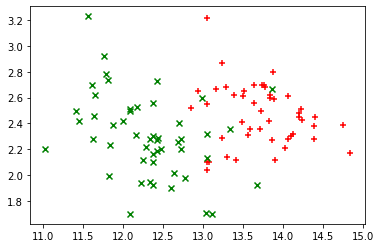

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(X_train, y_train)

Dari plot grafik diatas, kita bisa dengan jelas menarik sebuah garis yang akan menciptakan dua wilayah. Yaitu wilayah titik hijau dan wilayah titik merah. Dan pembagian dua wilayah tersebut akan dengan mudah kita lakukan dengan tingkat error yang kecil

## **Simple Logistic Regression**

In [ ]:
import numpy as np

def sigmoid(X): # fungsi
    return 1 / (1 + np.exp(-X))

def cost(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    hyp = sigmoid(X.dot(theta))
    pos = np.multiply(-y, np.log(hyp))
    neg = np.multiply((1 - y), np.log(1 - hyp))
    
    return np.sum(pos - neg) / (len(X))

def gradient(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    error = sigmoid(X.dot(theta)) - y
    return X.T.dot(error) / len(X)

In [ ]:
from scipy.optimize import fmin_tnc  

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
    
    return result[0]

theta = train(X_train, y_train)
print('theta: ', theta)

theta:  [67.2592176  -4.60390305 -3.04700611]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict(X, theta):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(X * np.matrix(theta).T) >= 0.5).astype(int)

predictions = predict(X_test, theta)

print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions, average='macro'))
print('recall:', recall_score(y_test, predictions, average='macro'))

accuracy: 0.9696969696969697
precision: 0.9615384615384616
recall: 0.9761904761904762


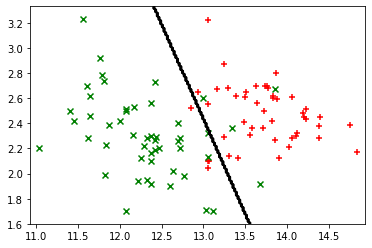

In [ ]:
from matplotlib import cm

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)

    plt.contour(xs, ys, zs, colors='black')
        
plot_points(X_train, y_train)
plot_boundary(X_train, lambda x: predict(x, theta))

## Logistic Regression menggunakan **Tensorflow**

TensorFlow adalah library yang dikembangkan oleh google dan merupakan salah satu library yang paling populer serta banyak digunakan untuk mengembangkan dan menerapkan Machine Learning dan algoritma lain yang memiliki banyak operasi matematika untuk dilakukan.

In [ ]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def tf_create(n_features, n_labels, lambda_):
    
    examples = tf.placeholder(tf.float64, [None, n_features])
    labels = tf.placeholder(tf.float64, [None, n_labels])
    weights = tf.Variable(tf.zeros([n_features, n_labels], dtype=tf.float64))
    bias = tf.Variable(tf.zeros([n_labels], dtype=tf.float64))
    
    hyp = tf.sigmoid(tf.matmul(examples, weights) + bias)
    loss = tf.reduce_mean(-labels * tf.log(hyp) - (1 - labels) * tf.log(1 - hyp))
    reg = lambda_ * tf.nn.l2_loss(weights)
    cost = loss + reg
    
    train = tf.train.AdamOptimizer().minimize(cost)
    predict = tf.argmax(hyp, axis=1)
    
    def train_(sess, X, y, iterations):
        for i in range(iterations):
            sess.run(train, feed_dict={examples: X, labels: y})
            
    def predict_(sess, X):
        return sess.run(predict, feed_dict={examples: X})
    
    return train_, predict_

Instructions for updating:
non-resource variables are not supported in the long term


Kali ini, kita akan mengelompokkan data kita menjadi 3 kelompok.

accuracy: 0.9333333333333333
precision: 0.9411764705882352
recall: 0.9565217391304347


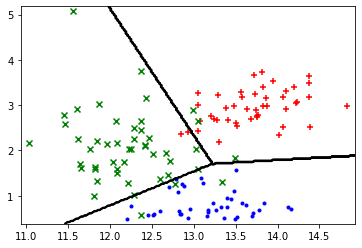

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

reduced2 = data[['alcohol', 'flavanoids']] # hanya ambil semua data yang ada dalam kolom 'alcohol' dan 'flavanoids',
# masukkan ke variabel 'reduced2'
# coba cek dataframe kita. Berapa baris dan kolom yang kita miliki sekarang?

X = reduced2.to_numpy() # mengubah dataframe kita menjadi numpy array lagi dan masukkan ke variabel X
# coba print isi X. Apa isinya?

reduced3 = data[['class']] # hanya ambil semua data yang ada dalam kolom 'class'. masukkan ke variabel 'reduced3'
# coba cek dataframe kita. Berapa baris dan kolom yang kita miliki sekarang?

y = reduced3.to_numpy() # mengubah dataframe kita menjadi numpy array lagi dan masukkan ke variabel y
# coba print isi y. Apa isinya?

y = label_binarize(y, classes=[1, 2, 3]) # metode one-vs-all-scheme. Coba cari tahu sendiri ya apa maksudnya itu.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

with tf.compat.v1.Session() as sess:
    
    train, predict = tf_create(X.shape[1], y.shape[1], 0.0)
    sess.run(tf.global_variables_initializer())
    train(sess, X_train, y_train, 30000)

    predictions = predict(sess, X_test)
    y_test = y_test.argmax(axis=1)

    print('accuracy:', accuracy_score(y_test, predictions))
    print('precision:', precision_score(y_test, predictions, average='macro'))
    print('recall:', recall_score(y_test, predictions, average='macro'))

    plot_boundary(X_train, lambda x: predict(sess, x))
    plot_points(X_train, y_train.argmax(axis=1))


accuracy: 1.0
precision: 1.0
recall: 1.0


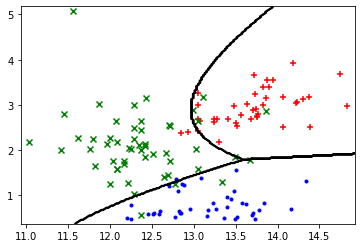

In [ ]:
from sklearn.preprocessing import label_binarize
reduced2 = data[['alcohol', 'flavanoids']] # hanya ambil semua data yang ada dalam kolom 'alcohol' dan 'flavanoids',
# masukkan ke variabel 'reduced2'
# coba cek dataframe kita. Berapa baris dan kolom yang kita miliki sekarang?

X = reduced2.to_numpy() # mengubah dataframe kita menjadi numpy array lagi dan masukkan ke variabel X
# coba print isi X. Apa isinya?

def transform_x(x):
    return [x[0], x[1], x[0] ** 2, x[1] ** 2, x[0] * x[1]]

def transform(X):
    return np.apply_along_axis(transform_x, 1, X)

X = transform(X)

reduced3 = data[['class']] # hanya ambil semua data yang ada dalam kolom 'class'. masukkan ke variabel 'reduced3'
# coba cek dataframe kita. Berapa baris dan kolom yang kita miliki sekarang?

y = reduced3.to_numpy() # mengubah dataframe kita menjadi numpy array lagi dan masukkan ke variabel X
# coba print isi X. Apa isinya?

y = label_binarize(y, classes=[1, 2, 3]) # metode one-vs-all-scheme. Coba cari tahu sendiri ya apa maksudnya itu.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

with tf.Session() as sess:
    
    train, predict = tf_create(X.shape[1], y.shape[1], 0.0)
    sess.run(tf.global_variables_initializer())
    train(sess, X_train, y_train, 30000)

    predictions = predict(sess, X_test)
    y_test = y_test.argmax(axis=1)

    print('accuracy:', accuracy_score(y_test, predictions))
    print('precision:', precision_score(y_test, predictions, average='macro'))
    print('recall:', recall_score(y_test, predictions, average='macro'))

    plot_boundary(X_train, lambda x: predict(sess, transform(x)))
    plot_points(X_train, y_train.argmax(axis=1))

Jika nanti ada data Wine baru, menggunakan sistem yang sudah kita buat, data-data Wine tersebut akan masuk ke dalam salah satu dari 3 kelompok diatas

## **Latihan**

Coba kelompokkan data [diabetes](https://drive.google.com/drive/u/5/folders/1_ngw8-LWIzY2MtOVqMLLGqJrWqQPh2Im) berdasarkan 3 variabel dibawah menggunakan TensorFlow:
> a. Glucose (Kadar glukosa dalam darah)

> b. Bloodpressure (Tensi/tekanan darah)

> c. Pregnancies (Kehamilan)


KIRIMKAN KE EMAIL SAYA:
zakiulfahmi.fst@ar-raniry.ac.id

dengan format: MK_HARI_NAMA_LATIHAN_03

dikumpulkan sebelum 26 mei 2022

Catatan:
yang dikumpulkan hanya Simple Logistic Regression.

TensorFlow tidak jadi dikumpulkan.

Perhatikan threshold <=1, bukan <=2.

Kemudian, di label_binarize, classes[1,2], bukan classes[1,2,3]

## **Reference:**


https://github.com/crsmithdev/notebooks/blob/master/ml-logistic-regression/ml-logistic-regression.ipynb